In [1]:
# imports
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [30]:
# read in the speed dating data
df = pd.read_csv('./speed_dating.csv')

In [31]:
# remove unnecessary data points
del df['id'] # subject number within wave
del df['position'] # station number where met partner
del df['positin1'] # station number where started
del df['order'] # the number of date that night when met partner
del df['partner'] # partner’s id number the night of event

df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [35]:
# create basic network
dta = df.loc[df['wave'] == 1]
G = nx.from_pandas_dataframe(dta,'id','partner',edge_attr='match')
#graphs = list(nx.connected_component_subgraphs(G))

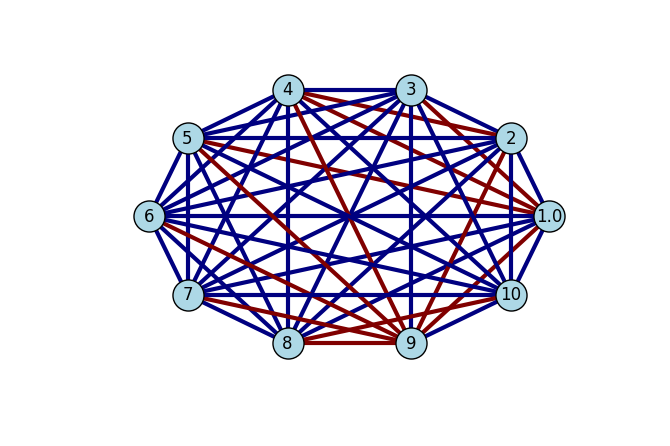

In [79]:
pos = nx.circular_layout(G)
e = G.edges()
colors = [G[u][v]['match'] for u,v in e]
nx.draw(G,pos,edges=e,node_color='lightblue',edge_color=colors,width=3,
        node_size=500,with_labels=True)